In [291]:
import numpy as np
import matplotlib.pyplot as plt

В классическом машинном обучении матрица признаков  - это матрица, в которой одна строка есть признаки для одного объекта. Мы сегодня будем рассматривать немного по другому, так как рассматривают обычно в статистике (транспонированную версию этой матрицы) - каждый объект это столбец

In [292]:
#Пространство признаков для объекта (стаж репетиторы)
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

Как думаете, для чего тут есть строка состоящая из единиц?

In [293]:
X.T

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [294]:
# Целевая переменная (средний балл ЕГЭ)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

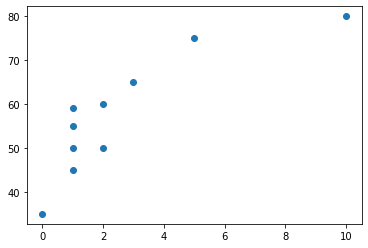

In [295]:
plt.scatter(X[1,:], y)
# y = a*x + b

In [296]:
#y = a*X[1]*b*X[0]

Уравнение прямой для одного признака будет задаваться уравнением y = a*x + b. За что отвечает a, за что отвечает b?

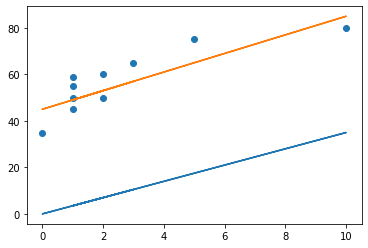

In [297]:
plt.scatter(X[1,:], y)
plt.plot(X[1, :], 3.5*X[1, :] )
plt.plot(X[1, :], 4*X[1, :] + 45)

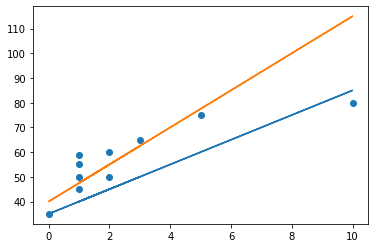

In [298]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*X[0] + X[1]*5)
plt.plot(X[1], 40*X[0] + X[1]*7.5)

# mse - mean squared error
# mae - mean absolute error

In [299]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [300]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [301]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

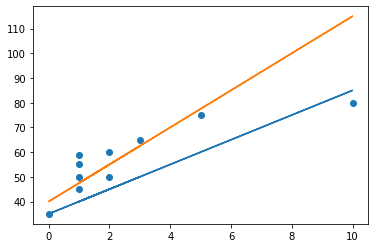

In [302]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1)
plt.plot(X[1], y_pred2)

In [303]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

In [304]:
err1, err2

(9.4, -2.1)

In [305]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [306]:
mae_1, mae_2

(10.4, 7.9)

In [307]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [308]:
mse_1, mse_2

(143.6, 151.35)

#### Метод наименьших квадратов

In [309]:
X.shape

(2, 10)

In [310]:
X.T.shape

(10, 2)

In [311]:
X.dot(X.T)

array([[ 10,  26],
       [ 26, 146]])

In [312]:
#вычисляем коэф-ты (веса признаков) аналитически
W = np.linalg.inv(X @ X.T) @ X @ y
W

array([47.23214286,  3.91071429])

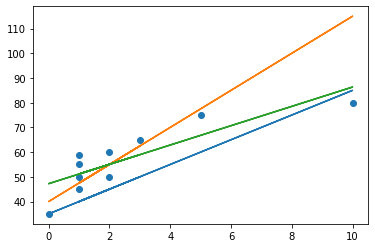

In [313]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [314]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [315]:
calc_mse(y, y_pred1)

143.6

In [316]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [317]:
calc_mae(y, y_pred1)

10.4

In [318]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [319]:
calc_mse(y, y_pred3)

45.93749999999999

In [320]:
calc_mae(y, y_pred3)

6.182142857142858

### Градиентный спуск

In [321]:
np.mean(y_pred - y)**2
np.mean(w*x - y)**2
np.sum(w*x - y)**2 / n
1/n * np.sum((w*x - y)**2)
(w*x - y)**2

2*z`

2*x*(w*x - y) 
2*x*(w*x - y)

SyntaxError: invalid syntax (<ipython-input-321-8f68037c9000>, line 7)

In [ ]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [ ]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [ ]:
W[0] - g

1. Подберите скорость обучения (alpha) и количество итераций:

In [ ]:
n = X.shape[1]
alpha = 1e-3
W = np.array([1, 0.5])
W, alpha

In [ ]:
for i in range(200000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    
    if i % 2000 == 0:
        print(i, W, err)
    if err < 45.9375:
        break
print(i, W, err)

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [ ]:
y_pred - y,X

In [328]:
n = X.shape[1]
alpha = 1e-3
W = np.array([1, 0.5])
W, alpha
errors = []

In [329]:
for i in range(200000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    #for ii in range(W.shape[0]):
    #    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    '''В методичке:'''
    '''new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]'''
    W -= (alpha * (1/n * 2 *np.dot(y_pred - y,X.T)))

    if i % 2000 == 0:
        print(i, W, err)
        errors.append(err)
    if err < 45.9375:
        break
print(i, W, err)

0 [1.1102 0.84  ] 3173.15
2000 [41.73215361  4.92632937] 62.2342399245102
4000 [46.54546925  4.03751382] 46.191525762883025
6000 [47.14641166  3.92654521] 45.94145963171206
8000 [47.22143932  3.91269078] 45.93756172083931
10000 [47.23080652  3.91096105] 45.93750096207484
12000 [47.23197602  3.91074509] 45.93750001499635
14000 [47.23212203  3.91071813] 45.93750000023376
16000 [47.23214026  3.91071477] 45.93750000000364
18000 [47.23214253  3.91071435] 45.93750000000005
18532 [47.23214267  3.91071432] 45.93749999999999


Text(0, 0.5, 'MSE')

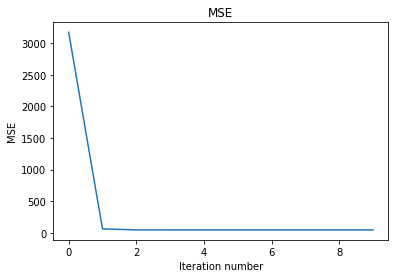

In [330]:
#colab.research.google.com
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [0]:
tlg: @emiliyam